Unzip data folder

In [ ]:
!unzip -o free-ai-classes-in-every-city-hackathon-2023.zip


Archive:  free-ai-classes-in-every-city-hackathon-2023.zip
  inflating: Sample_submission.csv   
  inflating: Housing_dataset_train.csv  
  inflating: Housing_dataset_test.csv  


importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv('Housing_dataset_train.csv')
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [3]:
test = pd.read_csv('Housing_dataset_test.csv')
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [4]:
sample_data = pd.read_csv('Sample_submission.csv')
sample_data.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [6]:
test.info

<bound method DataFrame.info of          ID      loc                 title  bedroom  bathroom  parking_space
0       845     Kano             Penthouse        4         1              2
1      1924  Adamawa             Apartment        2         2              4
2     10718  Adamawa              Bungalow        2         7              2
3     12076    Lagos               Mansion        9         5              2
4     12254    Gombe  Semi-detached duplex        5         6              1
...     ...      ...                   ...      ...       ...            ...
5995   1594    Ekiti                  Flat        4         5              2
5996   2416  Adamawa        Terrace duplex        5         7              1
5997  10195      Oyo             Townhouse        4         1              4
5998   9455   Bauchi                  Flat        3         7              5
5999  11736   Sokoto               Mansion        6         1              6

[6000 rows x 6 columns]>

In [7]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [8]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/c7/42/be1c7bbdd83e1bfb160c94b9cafd8e25efc7400346cf7ccdbdb452c467fa/setuptools-68.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/28/f5/6955d7b3a5d71ce6bac104f9cf98c1b0513ad656cdaca8ea7d579196f771/wheel-0.41.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.0
    Uninstalling wheel-0.41.0:
      Successfully uninstalled wheel-0.41.0
  Attempting uninstall: setuptools
    Found existing installation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 90.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080015 sha256=7db1354e5c5d8241f4ad0fad5856ae15957750ec0de30a08aebccad099857492
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.1.1
    Uninstalling bokeh-3.1.1:
      Successfully uninstalled bokeh-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.2.1 requires bokeh<3.3.

In [9]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [10]:
## filling nulls in numerical column to 0

train['bedroom'].fillna(0, inplace = True)
train['bathroom'].fillna(0, inplace = True)
train['parking_space'].fillna(0, inplace = True)

In [11]:
## removing nulls from location and title

train.dropna(inplace=True)

In [12]:
train.head(20)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,0.0,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,0.0,5.0,6.0,2600700.898
5,1733,Borno,Mansion,0.0,1.0,3.0,1341750.867
6,7892,Kwara,Bungalow,0.0,4.0,4.0,2125789.778
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
8,555,Osun,Semi-detached duplex,0.0,1.0,2.0,1219453.877
9,3085,Kaduna,Penthouse,0.0,3.0,3.0,2710664.872
10,12573,Ogun,Bungalow,1.0,2.0,6.0,1330213.036


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'bedroom'}>],
       [<Axes: title={'center': 'bathroom'}>,
        <Axes: title={'center': 'parking_space'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

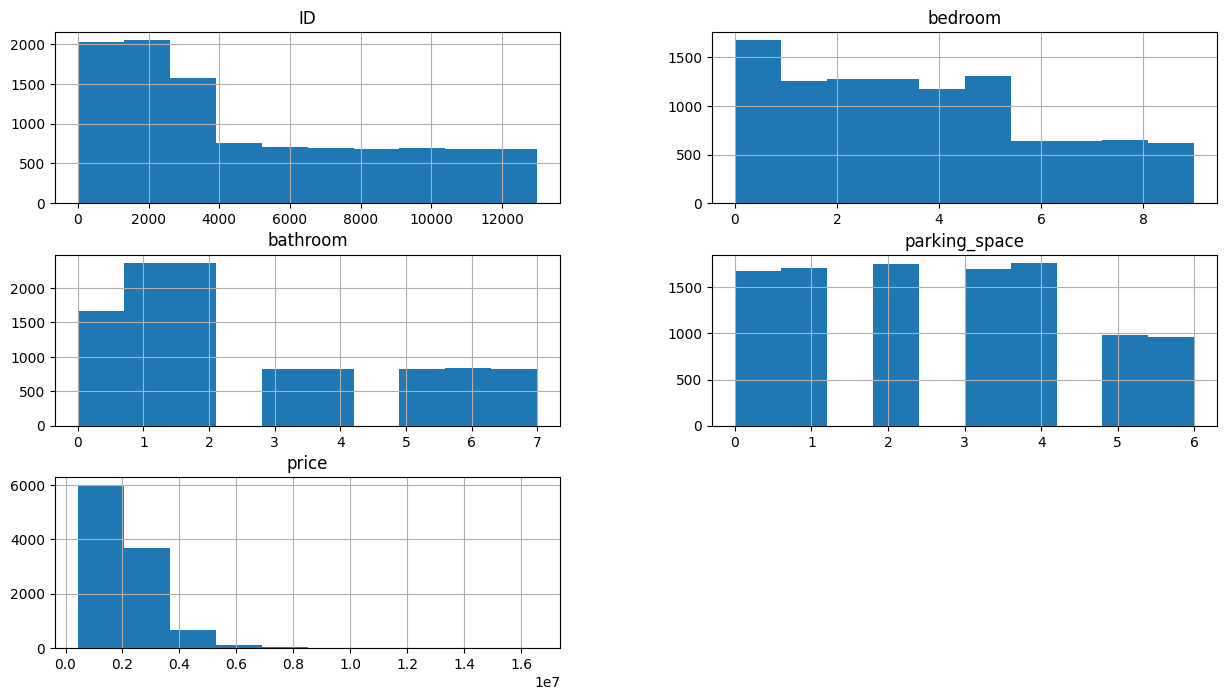

In [13]:
train.hist(figsize=(15, 8))

In [14]:
train.corr()

<ipython-input-14-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.182990,0.260584,0.124993,0.173519
bedroom,0.182990,1.000000,0.080583,0.007506,0.411628
bathroom,0.260584,0.080583,1.000000,0.054855,0.169865
parking_space,0.124993,0.007506,0.054855,1.000000,0.081973
price,0.173519,0.411628,0.169865,0.081973,1.000000


<ipython-input-15-41d85c2c4424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

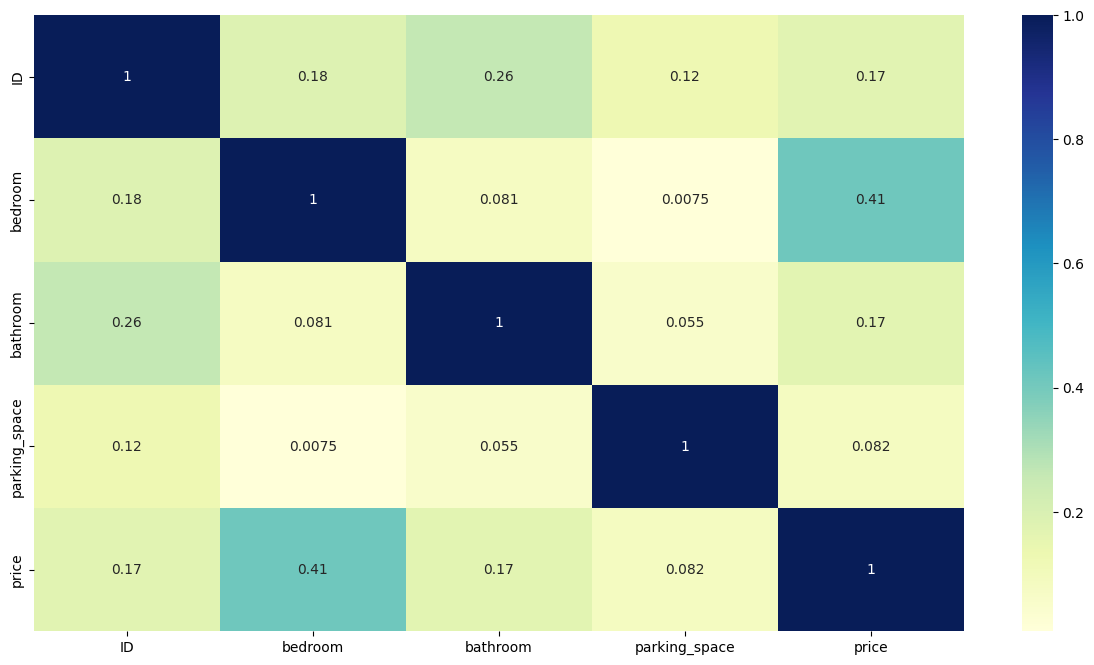

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')

In [16]:
sns.set_style('darkgrid')

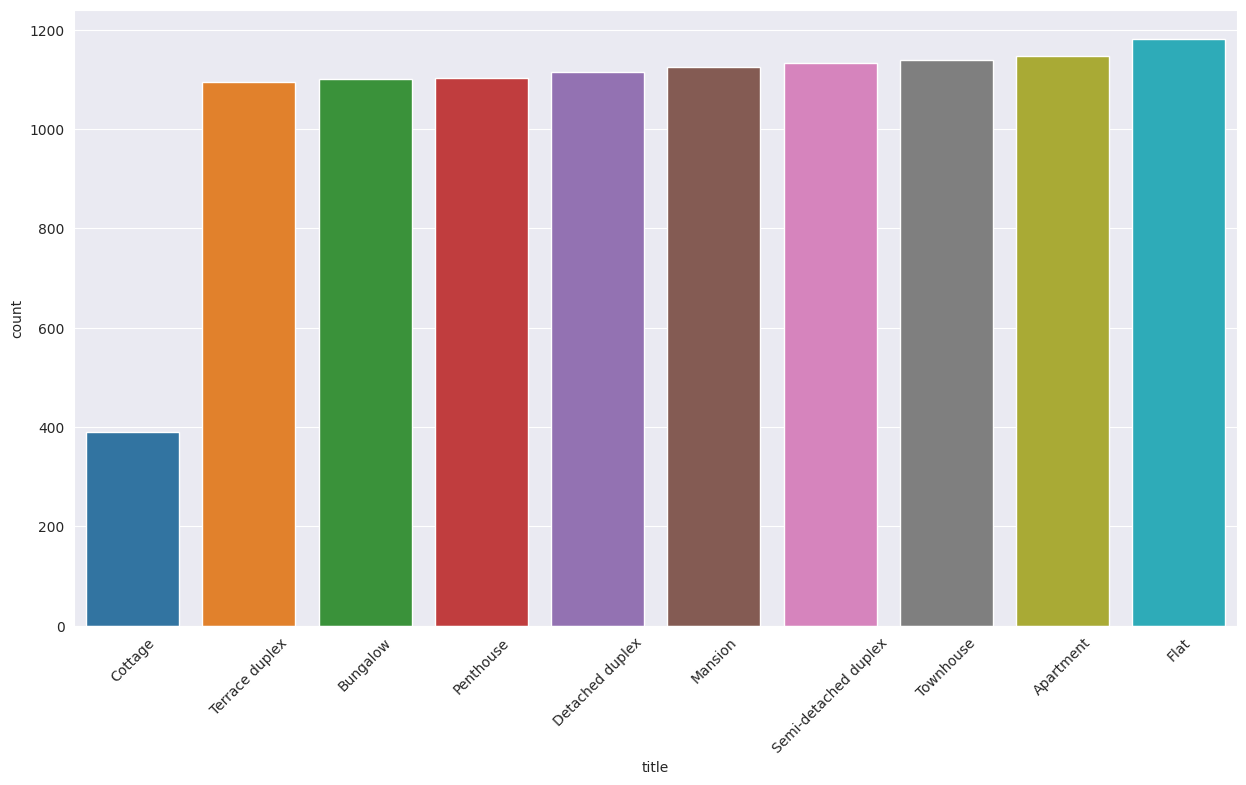

In [17]:
plt.figure(figsize=(15,8))
g = sns.countplot(x='title', data = train, order = train.title.value_counts().index[::-1])
g.set_xticklabels(
    labels= train.title.value_counts().index[::-1], rotation=45)
plt.show()

<ipython-input-18-0085dd70b8fb>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_xticklabels(


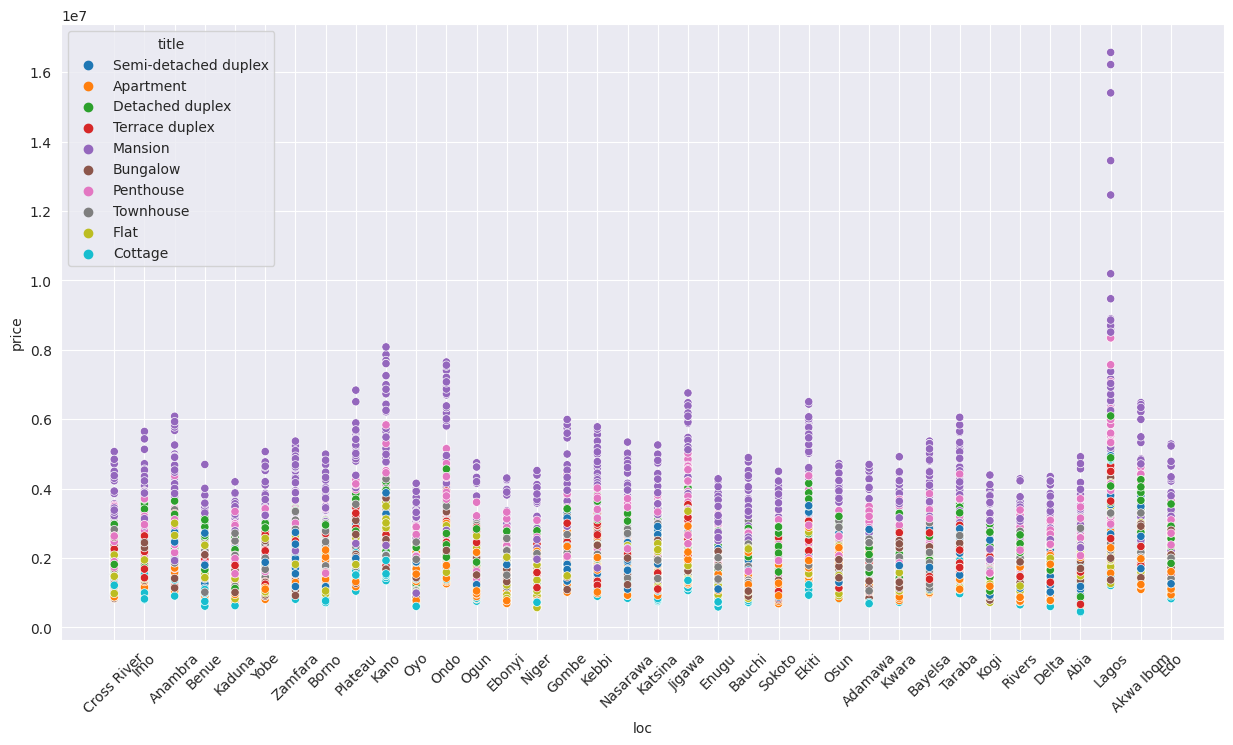

In [18]:
plt.figure(figsize=(15,8))
d = sns.scatterplot(x= 'loc', y = 'price', data = train, hue = 'title')
d.set_xticklabels(
    labels= train['loc'].value_counts().index, rotation=45)
plt.show()

In [19]:
train["bedroom"] = train["bedroom"].astype(int)
train["bathroom"] = train["bathroom"].astype(int)
train["parking_space"] = train["parking_space"].astype(int)
train["title"] = train["title"].astype("category")
train["loc"] = train["loc"].astype("category")
test["bedroom"] = test["bedroom"].astype(int)
test["bathroom"] = test["bathroom"].astype(int)
test["parking_space"] = test["parking_space"].astype(int)
test["loc"] = test["loc"].astype("category")

In [20]:
train['title'].value_counts()

Flat                    1182
Apartment               1147
Townhouse               1139
Semi-detached duplex    1133
Mansion                 1125
Detached duplex         1115
Penthouse               1103
Bungalow                1102
Terrace duplex          1095
Cottage                  390
Name: title, dtype: int64

In [21]:
le = LabelEncoder()

train['loc'] = le.fit_transform(train['loc'])
test['loc'] = le.fit_transform(test['loc'])

In [22]:

train['title'] = le.fit_transform(train['title'])
test['title'] = le.fit_transform(test['title'])

In [23]:
train['total_room'] = train['bedroom'] + train['bathroom']
test['total_room'] = test['bedroom'] + test['bathroom']

<Axes: >

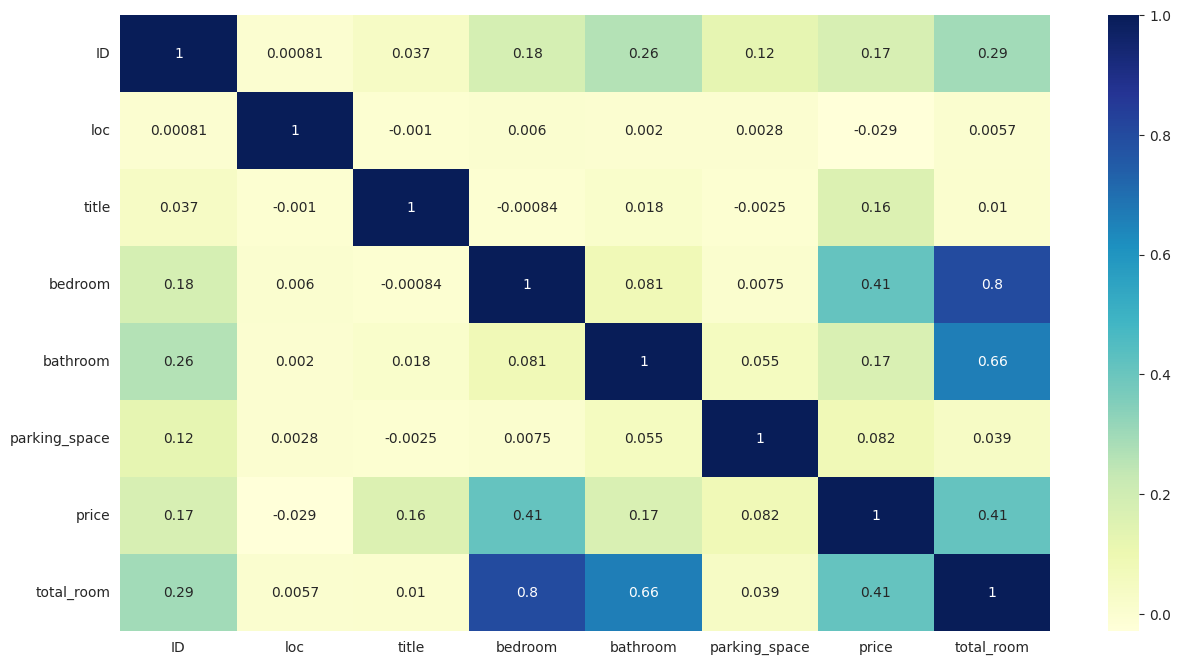

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')

In [25]:
from autogluon.core.utils import root_mean_squared_error
predictor = TabularPredictor(label = 'price', eval_metric = 'root_mean_squared_error', learner_kwargs={'ignored_columns': ['ID']}).fit(
    train_data = train,
    time_limit = 1000,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230809_101623/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230809_101623/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   84.89 GB / 115.66 GB (73.4%)
Train Data Rows:    10531
Train Data Columns: 7
Label Column: price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (16568486.16, 431967.29, 2127766.86289, 1069676.4482)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify

In [36]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model     score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -4.178782e+05      13.933193  552.866423                0.002239           0.518111            3       True         14
1      WeightedEnsemble_L2 -4.188200e+05       0.661583  104.147065                0.001404           0.659476            2       True          9
2          LightGBM_BAG_L2 -4.205552e+05      11.791174  403.589782                0.108147          29.750498            2       True         11
3          CatBoost_BAG_L1 -4.207402e+05       0.050042   74.555254                0.050042          74.555254            1       True          6
4          CatBoost_BAG_L2 -4.223548e+05      11.744687  428.674381                0.061660          54.835097            2       True         13
5          LightGBM_BAG_L1 -4.298074e+05       0.610138   28.9

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -1097121.799190273,
  'KNeighborsDist_BAG_L1': -1090713.0063588107,
  'LightGBMXT_BAG_L1': -463807.14541971026,
  'LightGBM_BAG_L1': -429807.37533131166,
  'RandomForestMSE_BAG_L1': -5372

In [37]:
predictions = predictor.predict(test)
predictions.head()

0    2259573.750
1    1043875.375
2    1248019.125
3    7598265.000
4    1915181.375
Name: price, dtype: float32

In [38]:
sub_file = pd.DataFrame({
    'ID': test.ID,
    'price': predictions
})

sub_file.to_csv('submission2.csv', index = False)

In [30]:
import autogluon.core as ag
nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

predictor_new_hpo = TabularPredictor(label = 'price', eval_metric = 'root_mean_squared_error', learner_kwargs={'ignored_columns': ['ID']}).fit(
    train_data = train,
    time_limit = 600,
    presets="best_quality",
    num_bag_folds = 5,
    num_bag_sets = 3,
    num_stack_levels  = 2,
    hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': 5,
    'scheduler' : 'local',
    'searcher': 'auto'
    },
    hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                         }
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230809_113448/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=3
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230809_113448/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   84.01 GB / 115.66 GB (72.6%)
Train Data Rows:    10531
Train Data Columns: 7
Label Column: price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (16568486.16, 431967.29, 2127766.86289, 1069676.4482)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify 

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-449883.705	 = Validation score   (-root_mean_squared_error)
	24.36s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-441780.2324	 = Validation score   (-root_mean_squared_error)
	41.35s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-452041.4223	 = Validation score   (-root_mean_squared_error)
	27.18s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 119.91s of the 506.54s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/search/hyperopt/hy

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L2/T1 ...
	-441091.4932	 = Validation score   (-root_mean_squared_error)
	21.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-445762.3937	 = Validation score   (-root_mean_squared_error)
	19.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-440999.4273	 = Validation score   (-root_mean_squared_error)
	19.08s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-683471.2064	 = Validation score   (-root_mean_squared_err

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L3/T1 ...
	-449962.0345	 = Validation score   (-root_mean_squared_error)
	21.91s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L3/T2 ...
	-461576.5592	 = Validation score   (-root_mean_squared_error)
	26.41s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L3/T3 ...
	-447293.5256	 = Validation score   (-root_mean_squared_error)
	18.86s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L3/T4 ...
	-687634.8342	 = Validation score   (-root_mean_squared_error)
	17.93s	 = Training   runtime
	0.0s	 = Vali

In [31]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model      score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -435972.472965       0.888487  255.753403                0.001227           0.404223            3       True         10
1   WeightedEnsemble_L2 -437333.897896       0.352003   98.502314                0.001100           0.255478            2       True          4
2    LightGBM_BAG_L1/T2 -438486.674330       0.204350   58.968136                0.204350          58.968136            1       True          2
3    LightGBM_BAG_L2/T3 -438616.743536       0.669842  176.919699                0.157016          35.110415            2       True          7
4    LightGBM_BAG_L2/T1 -438690.850168       0.663823  183.204186                0.150998          41.394902            2       True          5
5   WeightedEnsemble_L4 -438882.958493       1.611960  401.504632         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L3/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -448961.38086810877,
  'LightGBM_BAG_L1/T2': -438486.67432954337,
  'LightGBM_BAG_L1/T3': -449820.4736027075,
  'WeightedEnsemble_L2': -437333.89789592096,
  'LightG

In [32]:
predictor_new = predictor_new_hpo.predict(test)

In [33]:
predictor_new.describe()

count    6.000000e+03
mean     2.160228e+06
std      9.995137e+05
min      8.417907e+05
25%      1.446128e+06
50%      1.949589e+06
75%      2.621456e+06
max      7.803520e+06
Name: price, dtype: float64

In [34]:
predictor_new.head()

0    2387829.250
1    1052322.000
2    1259308.500
3    7196065.000
4    1958140.125
Name: price, dtype: float32

In [35]:
sub_file = pd.DataFrame({
    'ID': test.ID,
    'price': predictor_new
})

sub_file.to_csv('submission.csv', index = False)